# imports

In [8]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from prophet import Prophet

In [2]:
weather = pd.read_csv('data/madrid_weather.csv', parse_dates=['time'])
weather.head()

,time,temperature,wind_speed,wind_direction,humidity,barometric_pressure,solar_radiation,precipitation
0,2019-01-01 00:59:00,3.1,0.65,64,50,949,0,0.0
1,2019-01-01 01:59:00,2.9,0.95,32,49,949,0,0.0
2,2019-01-01 02:59:00,3.1,0.87,62,46,949,0,0.0
3,2019-01-01 03:59:00,1.9,0.73,75,51,949,0,0.0
4,2019-01-01 04:59:00,0.7,0.57,53,56,949,0,0.0


<AxesSubplot:xlabel='time'>

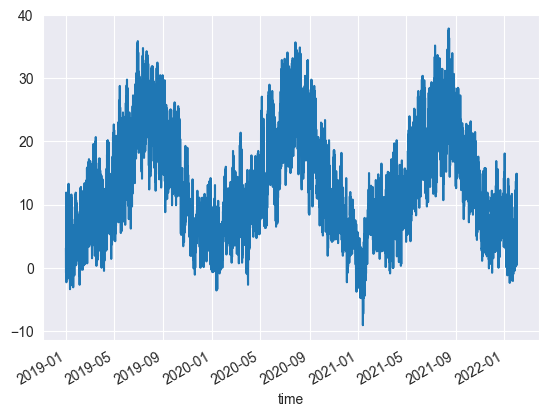

In [3]:
# 3 years of data
weather.set_index('time').loc[:, "temperature"].plot()

<AxesSubplot:xlabel='time'>

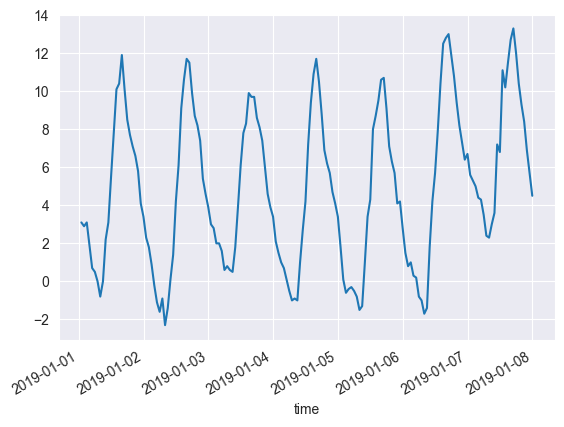

In [4]:
# the 1st week
weather.set_index('time').loc[:"2019-01-07", "temperature"].plot()

<AxesSubplot:xlabel='time'>

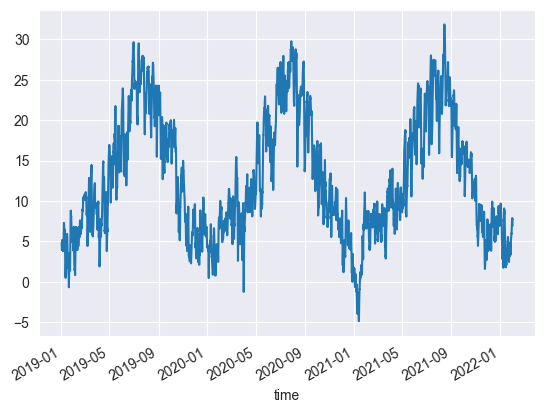

In [5]:
# 24 = daily moving avg
# (24*30) = 30-day moving avg
# 24 * 365 = yearly moving avg

weather.set_index('time').loc[:, "temperature"].rolling(24).mean().plot()

<AxesSubplot:xlabel='time'>

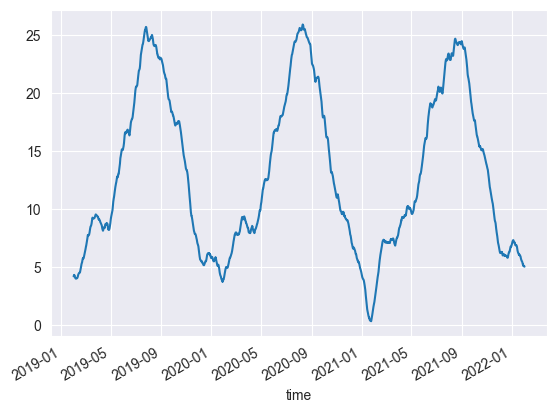

In [6]:
weather.set_index('time').loc[:, "temperature"].rolling(24*30).mean().plot()

<AxesSubplot:xlabel='time'>

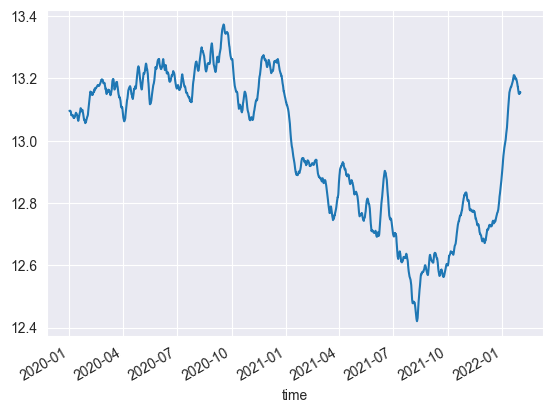

In [7]:
weather.set_index('time').loc[:, "temperature"].rolling(24*365).mean().plot()

# Prophet

In [9]:
# hourly weather data
weather.head(10)

,time,temperature,wind_speed,wind_direction,humidity,barometric_pressure,solar_radiation,precipitation
0,2019-01-01 00:59:00,3.1,0.65,64,50,949,0,0.0
1,2019-01-01 01:59:00,2.9,0.95,32,49,949,0,0.0
2,2019-01-01 02:59:00,3.1,0.87,62,46,949,0,0.0
3,2019-01-01 03:59:00,1.9,0.73,75,51,949,0,0.0
4,2019-01-01 04:59:00,0.7,0.57,53,56,949,0,0.0
5,2019-01-01 05:59:00,0.5,0.57,24,53,949,0,0.0
6,2019-01-01 06:59:00,0.0,0.80,345,55,949,0,0.0
7,2019-01-01 07:59:00,-0.8,0.85,78,60,949,0,0.0
8,2019-01-01 08:59:00,0.0,0.90,34,56,949,10,0.0
9,2019-01-01 09:59:00,2.2,0.73,84,48,950,99,0.0


## set index to time column

In [0]:
weather.set_index('time', inplace=True)

## split train/test

In [17]:
weather_train = weather["2019-05-17":"2019-05-31"].reset_index()
weather_train

,time,temperature,wind_speed,wind_direction,humidity,barometric_pressure,solar_radiation,precipitation
0,2019-05-17 00:59:00,9.1,5.78,289,62,933,0,0.1
1,2019-05-17 01:59:00,9.0,5.95,299,60,933,0,0.0
2,2019-05-17 02:59:00,8.5,4.88,249,59,933,0,0.0
3,2019-05-17 03:59:00,8.0,4.28,304,59,934,0,0.0
4,2019-05-17 04:59:00,7.9,5.78,278,57,934,0,0.0
...,...,...,...,...,...,...,...,...
355,2019-05-31 19:59:00,27.2,1.45,146,12,942,327,0.0
356,2019-05-31 20:59:00,27.1,1.18,106,12,942,126,0.0
357,2019-05-31 21:59:00,25.6,1.27,182,15,942,8,0.0
358,2019-05-31 22:59:00,24.2,1.37,213,18,943,0,0.0


In [18]:
weather_test = weather["2019-06-01":"2019-06-03"].reset_index()

## prophet model

In [21]:
weather_train = weather_train.rename(columns={"time": "ds", "temperature": "y"})
weather_train

,ds,y,wind_speed,wind_direction,humidity,barometric_pressure,solar_radiation,precipitation
0,2019-05-17 00:59:00,9.1,5.78,289,62,933,0,0.1
1,2019-05-17 01:59:00,9.0,5.95,299,60,933,0,0.0
2,2019-05-17 02:59:00,8.5,4.88,249,59,933,0,0.0
3,2019-05-17 03:59:00,8.0,4.28,304,59,934,0,0.0
4,2019-05-17 04:59:00,7.9,5.78,278,57,934,0,0.0
...,...,...,...,...,...,...,...,...
355,2019-05-31 19:59:00,27.2,1.45,146,12,942,327,0.0
356,2019-05-31 20:59:00,27.1,1.18,106,12,942,126,0.0
357,2019-05-31 21:59:00,25.6,1.27,182,15,942,8,0.0
358,2019-05-31 22:59:00,24.2,1.37,213,18,943,0,0.0


In [22]:
model = Prophet()
model.fit(weather_train)

03:29:13 - cmdstanpy - INFO - Chain [1] start processing
03:29:14 - cmdstanpy - INFO - Chain [1] done processing


## 